<img style="float: left;" src="earth-lab-logo-rgb.png" width="150" height="150" />

# Earth Analytics Education - EA  Python Course Spring 2021

## Important  - Assignment Guidelines

1. Before you submit your assignment to GitHub, make sure to run the entire notebook with a fresh kernel. To do this first, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart & Run All)
2. Always replace the `raise NotImplementedError()` code with your code that addresses the activity challenge. If you don't replace that code, your notebook will not run.

```
# YOUR CODE HERE
raise NotImplementedError()
```

3. Any open ended questions will have a "YOUR ANSWER HERE" within a markdown cell. Replace that text with your answer also formatted using Markdown.
4. **DO NOT RENAME THIS NOTEBOOK File!** If the file name changes, the autograder will not grade your assignment properly.
6. When you create a figure, comment out `plt.show()` to ensure the autograder can grade your plots. For figure cells, DO NOT DELETE the code that says `DO NOT REMOVE LINE BELOW`.

```
### DO NOT REMOVE LINE BELOW ###
student_plot1_ax = nb.convert_axes(plt)
```

* Only include the package imports, code, and outputs that are required to run your homework assignment.
* Be sure that your code can be run on any operating system. This means that:
   1. the data should be downloaded in the notebook to ensure it's reproducible
   2. all paths should be created dynamically using the `os.path.join`

## Follow to PEP 8 Syntax Guidelines & Documentation

* Run the `autopep8` tool on all cells prior to submitting (HINT: hit shift + the tool to run it on all cells at once!
* Use clear and expressive names for variables. 
* Organize your code to support readability.
* Check for code line length
* Use comments and white space sparingly where it is needed
* Make sure all python imports are at the top of your notebook and follow PEP 8 order conventions
* Spell check your Notebook before submitting it.

For all of the plots below, be sure to do the following:

* Make sure each plot has a clear TITLE and, where appropriate, label the x and y axes. Be sure to include UNITS in your labels.


### Add Your Name Below 
**Your Name: Christy Sandberg**

<img style="float: left;" src="colored-bar.png"/>

---

# Week 04 and 05 Homework - Automate NDVI Workflow

For this assignment, you will write code to generate a plot of the mean normalized difference vegetation index (NDVI) for two different sites in the United States across one year of data:

* San Joaquin Experimental Range (SJER) in Southern California, United States
* Harvard Forest (HARV) in the Northeastern United States

The data that you will use for this week is available from **earthpy** using the following download: 

`et.data.get_data('ndvi-automation')`

## Assignment Goals

Your goal in this assignment is to create the most efficient and concise workflow that you can that allows for:

1. The code to scale if you added new sites or more time periods to the analysis.
2. Someone else to understand your workflow.
3. The LEAST and most efficient (i.e. runs fast, minimize repetition) amount of code that completes the task.

### HINTS

* Remove values outside of the landsat valid range of values as specified in the metadata, as needed.
* Keep any output files SEPARATE FROM input files. Outputs should be created in an outputs directory that is created in the code (if needed) and/or tested for.
* Use the functions that we demonstrated during class to make your workflow more efficient.
* BONUS - if you  chose - you can export your data as a csv file. You will get bonus points for doing this.


## Assignment Requirements

Your submission to the GitHub repository should include:
* This Jupyter Notebook file (.ipynb) with:
    * The code to create a plot of mean NDVI across a year for  2 NEON Field Sites:
        * NDVI on the x axis and formatted dates on the y for both NEON sites on one figure/axis object
    * The **data should be cleaned to remove the influence of clouds**. See the [earthdatascience website for an example of what your plot might look like with and without removal of clouds](https://www.earthdatascience.org/courses/earth-analytics-python/create-efficient-data-workflows/).
* BONUS: Create one output `.csv` file that has 3 columns - NDVI, Date and Site Name - with values for SJER and HARV.

Your notebook should:
* Have *at least* 2 well documented and well named functions with docstrings.
* Include a Markdown cell at the top of the notebook that outlines the overall workflow using pseudocode (i.e. plain language, not code)
* Include additional Markdown cells throughout the notebook to describe: 
    * the data that you used - and where it is from
    * how data are being processing
    * how the code is optimized to run fast and be more concise

# Replace this cell with your pseudocode  for this workflow

If you happen to be a diagram person a diagram is ok too



**PSEUDOCODE**

TAKE FILEPATH AND CALCULATE NDVI AT SITES WITH INFO STORED IN A SET FORMAT AT THE GIVEN FILEPATH

* Create glob list of scene folders at given file location.

* Create empty list to store info about each landsat scene.

* Loop through each landsat scene folder create function for this?
    - get the site name from site directory name (site name is in directory two levels above scene directory)
    - get the data acquisition date from scene directory name ([10-18])
    - get crop shape file ('.shp') from vector directory ('SITES//vector')
    - get lists of tif files using (glob lists using wildcards)
        - red and near-infrared band tif files needed to calculate NDVI
        - the qa layer needed to create cloud mask
    - create 'qa_pixel from qa band and crop shape

* open 'ndvi_bands' (red and near infrared bands), to process ndvi for scene (use valid range of 0-10000)

* calculate NDVI using n_diff = (b1 - b2) / (b1 + b2)

* mask the NDVI using the 'cloud_mask'

* append 'site', 'date', and 'mean_ndvi' to list (mean_ndvi = ndvi.mean().values)

* Convert list to dataframe
    - column names for the final DataFrame should be 'mean_ndvi' and 'site'
    - convert date to datetime, and use as index
    - create plot showing mean ndvi for each site over time (include legend)

* Export/Output the final mean_ndvi_df to a csv file

* save to 'outputs' folder (create that folder if it doesn't already exist)

In [1]:
# Autograding imports - do not modify this cell
import matplotcheck.autograde as ag
import matplotcheck.notebook as nb
import matplotcheck.timeseries as ts
from datetime import datetime

In [2]:
# Import needed packages in PEP 8 order
# and no unused imports listed (10 points total)

# YOUR CODE HERE
# Import necessary packages
import os
from glob import glob

import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import pandas as pd
import rioxarray as rxr
import xarray as xr
from rasterio.plot import plotting_extent
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import earthpy.mask as em

# Get data and set working directory
data = et.data.get_data('ndvi-automation')
os.chdir(os.path.join(et.io.HOME,
                      "earth-analytics",
                      "data"))



In [3]:
# DO NOT MODIFY THIS CELL
# Tests that the working directory is set to earth-analytics/data

path = os.path.normpath(os.getcwd())
student_wd_parts = path.split(os.sep)

if student_wd_parts[-2:] == ['earth-analytics', 'data']:
    print("\u2705 Great - it looks like your working directory is set correctly to ~/earth-analytics/data")
else:
    print("\u274C Oops, the autograder will not run unless your working directory is set to earth-analytics/data")

✅ Great - it looks like your working directory is set correctly to ~/earth-analytics/data


# Figure 1: Plot 1 - Mean NDVI For Each Site Across the Year (50 points)

Create a plot of the mean normalized difference vegetation index (NDVI) for the two different sites in the United States across the year: 

* NDVI on the x axis and formatted dates on the y for both NEON sites on one figure/axis object.
* Each site should be identified with a different color in the plot and legend.
* The final plot **data should be cleaned to remove the influence of clouds**.
* Be sure to include appropriate title and axes labels.

Add additional cells as needed for processing data (e.g. defining functions, etc), but be sure to:
* follow the instructions in the code cells that have been provided to ensure that you are able to use the sanity check tests that are provided. 
* include only the plot code in the cell identified for the final plot code below

## Task 1: 

In the cell below, create a single dataframe containing MEAN NDVI, the site name, 
and the date of the data for the HARV site 
scene `HARV/landsat-crop/LC080130302017031701T1-SC20181023151837`.  The column names for the  final
DataFrame should be`mean_ndvi`, and `site`, and the data should be **indexed on the date**. 

Use the functions that we reviewed in class (or create your own versions of them) to implement your code

### In the Cell below Place  All Functions Needed to Run this Notebook (20 points)

The two functions I've created for this assignment are:

1. **'process_single_scene'** - this function will collect four variables needed 
from each scene to populate the final dataframe with 'site', 'date' and 
'mean_ndvi'. 

    1. site name
    2. data acquisition date
    3. cloud mask layer from scene's 'qa' file
    4. list of red and near-infrared bands
    
    This function will open the red and near-infrared bands needed for the NDVI 
    calculation, clipping to a crop shape that is identified earlier in the 
    function. 
    It will also remove any values outside of a given valid range of values (if 
    that valid range is provided to the function). The actual NDVI calculation 
    occurs outside the 'process_single_scene' function.
    

2. **'calculate_masked_ndvi'** - this function will calculate the NDVI from two 
bands provided in the 'ndvi_list', and then mask the NDVI values from a cloud 
mask layer generated from the 'pixel_qa' variable provided by the 
'process_single_scene' function and a 'cloud_vals' list that can be maintained 
inside the function.

In [4]:
### DO NOT REMOVE THIS LINE OR EDIT / MOVE THIS CELL ###
start_time = datetime.now()

In [5]:
# In this cell place all of the functions needed to run your notebook
# You will be graded here on function application, docstrings, efficiency so ensure
# All functions are placed here!

# YOUR CODE HERE
 
# function to process single landsat scene in directory 
def process_single_scene (path_to_scene_dir, valid_range):
    """Get four variables needed from each landsat scene to create NDVI df.
    
    Can be used when Site and Scene directories are organized in a standard 
    format, where the Site directory has a 'vector' directory that stores the 
    crop shape, and a 'landsat-crop' directory that stores the tif files.
   
    Parameters
    ----------
    path_to_scene_dir : str
        this string is a filepath to a directory containing tif files from a 
        single landsat scene.
    valid_range : tuple
        this tuple not required, but represents a valid min/max range of  
        values for a landsat tif file; if given, the formula will clean the 
        bands to the range provided.    
        
    Returns
    -------
    site : str
        NEON site name - four letter abbreviation
    date : str
        date the Landsat satellite collected the data
    pixel_qa : xarray.core.dataarray
        landsat pixel_qa layer
    ndvi_bands : list
        list of two cropped bands to be used for NDVI calculation
        
    """     
    
    # get the site name ('site') from site directory name 
    path_to_site_dir = os.path.dirname(os.path.dirname(
        os.path.normpath(path_to_scene_dir)))
    site = os.path.basename(os.path.normpath(path_to_site_dir))
    
    # get the data acquisition date ('date') from scene directory name 
    date = os.path.basename(os.path.normpath(path_to_scene_dir))[10:18]
      
    # get shapefile needed for 'crop_shape'
    crop_shape_path = glob(os.path.join(path_to_site_dir, 'vector', '*.shp'))
    crop_shape = gpd.read_file(os.path.normpath(crop_shape_path[0])) 
                    
    # create cloud mask layer from qa band
    # open the qa band needed for the cloud mask, clip to crop_shape
    pixel_qa_band_path = glob(os.path.join(path_to_scene_dir, "*qa.tif"))[0]
    pixel_qa = rxr.open_rasterio(
        pixel_qa_band_path, masked=True).rio.clip(
        crop_shape.geometry, from_disk=True).squeeze()
    
    # get 'ndvi_bands' list; info needed to calculate NDVI at later step
    # open the red and infrared bands and clip to crop_shape
    ndvi_bands_path = sorted(
        glob(os.path.join(path_to_scene_dir, "*band[4-5]*")))
    ndvi_bands = []
    for band_path in ndvi_bands_path:
        band = rxr.open_rasterio(band_path, masked=True).rio.clip(
            crop_shape.geometry, from_disk=True).squeeze()
        
        # mask values to valid range (if valid_range is given)
        if valid_range:
            mask = ((band < valid_range[0]) | (band > valid_range[1]))
            clean_band = band.where(~xr.where(mask, True, False)) 
        ndvi_bands.append(clean_band)
    
    # function returns four variables
    return(site, date, pixel_qa, ndvi_bands)
    
    
#  function to calculate NDVI, with data removed when it is hidden by clouds 
def calculate_masked_ndvi(ndvi_bands, pixel_qa):
    """calculates NDVI; removes data that is hidden by clouds 
    
    Calculates normalized difference from two arrays of same shape. Math will 
    be calculated (b1-b2) / (b1+b2). Also removes values that are obscured by 
    clouds, applying the pixel_qa layer when it's values are found in the 
    'cloud_vals' list maintained inside this function.
    
     Parameters
     ----------
     ndvi_bands : list 
         List of two numpy arrays of same shape
     pixel_qa : xarray.core.dataarray
         landsat pixel_qa layer
    
    Returns
     ----------
     ndvi_masked : numpy array
         The element-wise result of (b1-b2) / (b1+b2) calculation after the 
         cloud mask is applied 

    """
    ndvi = (ndvi_bands[1]-ndvi_bands[0]) / (ndvi_bands[1]+ndvi_bands[0])
    
    cloud_vals = [328, 392, 840, 904, 1350, 352, 368, 416, 432, 480, 864, 
                  880, 928, 944, 992, 480, 992]
                  
    ndvi_masked = ndvi.where(~pixel_qa.isin(cloud_vals))
    
    return(ndvi_masked)

**The process for creating a dataframe showing columns for 'site', 'mean_ndvi' 
and indexed by date is tested using a filepath to a single landsat scene.**

In [6]:
# Create dataframe of mean NDVI in this cell using the functions created above
# Important: to use the ungraded tests below as a sanity check,
# name your columns: mean_ndvi and site
# Call the dataframe at the end of the cell so the tests run on it!
# Be sure that the date column is an index of type date
# HINT: the time series lessons may help you remember how to do this!

# YOUR CODE HERE

# In the cell below, create a single dataframe containing MEAN NDVI, the site 
# name, and the date of the data for the HARV site scene 
# HARV/landsat-crop/LC080130302017031701T1-SC20181023151837. 
# The column names for the final DataFrame should bemean_ndvi, and site, and 
# the data should be indexed on the date.

# create empty list
scene_ndvi_list=[]

# create filepath to single landsat scene directory
harv_scene_path = os.path.join('ndvi-automation', 'sites', 'HARV', 
                               'landsat-crop', 
                               'LC080130302017031701T1-SC20181023151837')

# use 'process_single_scene' function to return needed variables
site_loc, acq_date, pixel_qa, ndvi_bands = process_single_scene (
    harv_scene_path, (0,10000))

# use 'calculate_masked_ndvi' function to get NDVI values
masked_ndvi = calculate_masked_ndvi(ndvi_bands, pixel_qa)

# append scene variables to list
scene_ndvi_list.append([acq_date, site_loc, masked_ndvi.mean().values])

# convert scene_ndvi_list to dataframe with date as datetime index
scene_ndvi_df = pd.DataFrame(data=scene_ndvi_list, 
                       columns=['date', 'site', 'mean_ndvi'])
scene_ndvi_df['date'] = pd.to_datetime(scene_ndvi_df['date'], yearfirst=True, 
                                 format='%Y-%m-%d')
scene_ndvi_df = scene_ndvi_df.set_index('date')

scene_ndvi_df


,site,mean_ndvi
date,,
2017-03-17,HARV,0.281131628228094


In [7]:
# This cell  is testing your data output above

student_ndvi_ts_single_site = _

single_scene_points = 0

# Ensure the data is stored in a dataframe.
if isinstance(student_ndvi_ts_single_site, pd.DataFrame):
    print('\u2705 Your data is stored in a DataFrame!')
    single_scene_points += 1
else:
    print('\u274C It appears your data is not stored in a DataFrame. ',
          'To see what type of object your data is stored in, check its type with type(object)')

# Ensure that the date column is the index
if isinstance(student_ndvi_ts_single_site.index, pd.core.indexes.datetimes.DatetimeIndex):
    print('\u2705 You have the index set to the date column!')
    single_scene_points += 2
else:
    print('\u274C You do not have the index set to the date column.')

# Ensure that the date column is datetime
if isinstance(student_ndvi_ts_single_site.index[0], pd._libs.tslibs.timestamps.Timestamp):
    print('\u2705 The data in your date column is datetime!')
    single_scene_points += 2
else:
    print('\u274C The data in your date column is not datetime.')

# Ensure the site name is correct
if student_ndvi_ts_single_site.site.values[0] == 'HARV':
    print('\u2705 You have the correct site name!')
    single_scene_points += 5
else:
    print('\u274C You do not have the correct site name.')

if np.allclose(0.281131628228094, student_ndvi_ts_single_site.mean_ndvi.values[0]):
    print('\u2705 You have the correct mean NDVI value!')
    single_scene_points += 5
else:
    print('\u274C You do not have the correct mean ndvi value.')

print("\n \u27A1 You received {} out of 15 points for creating a dataframe.".format(
    single_scene_points))
single_scene_points

✅ Your data is stored in a DataFrame!
✅ You have the index set to the date column!
✅ The data in your date column is datetime!
✅ You have the correct site name!
✅ You have the correct mean NDVI value!

 ➡ You received 15 out of 15 points for creating a dataframe.


15

## Task 2:

In the cell below, process all of the landsat scenes. Create a DataFrame that contains the following 
information for each scene


|   | index  | site  | mean_ndvi  | 
|---|---|---|---|
| Date  |   |   |   |
|  2017-01-07  | 0  | SJER  | .4  |  

Be sure to call your dataframe at the end of the cell to ensure autograding works.
HINT: FOR THIS STEP, leave any rows containing missing values (`NAN`).

**The process used for creating a dataframe of a single landsat scene is expanded 
with a loop, to collect info on all landsat scenes in a directory.**

In [8]:
# Create dataframe of NDVI including the cleaning data to deal with clouds

# Important: to use the ungraded tests below as a sanity check,
# name your columns: mean_ndvi and site
# Don't forget to set date as the index and make the values of type datetime

# YOUR CODE HERE

# Create glob list of all scene folders at given file location
scene_dirs = glob(os.path.join('ndvi-automation', 'sites', '*', 
                               'landsat-crop', '*'))

# Create empty list to store info about each landsat scene.
full_ndvi_list = []

# Loop through each landsat scene folder
for scene in scene_dirs:
    
    # use 'process_single_scene' function to get the site name, data 
    # acquisition date, pixel_qa & ndvi_bands list 
    site_loc, acq_date, pixel_qa, ndvi_bands = process_single_scene (
        scene, (0,10000))

    # use 'calculate_masked_ndvi' function to get get ndvi with cloud mask
    masked_ndvi = calculate_masked_ndvi(ndvi_bands, pixel_qa)

    # append 'site', 'date', and 'mean_ndvi' to list
    full_ndvi_list.append([acq_date, site_loc, masked_ndvi.mean().values])

# convert list to dataframe with date as datetime index
full_ndvi_df = pd.DataFrame(data=full_ndvi_list, 
                       columns=['date', 'site', 'mean_ndvi'])
full_ndvi_df['date'] = pd.to_datetime(full_ndvi_df['date'], yearfirst=True, 
                                 format='%Y-%m-%d')
full_ndvi_df = full_ndvi_df.set_index('date')

# call dataframe at the end of the cell for autograding 
full_ndvi_df

,site,mean_ndvi
date,,
2017-01-12,HARV,nan
2017-01-28,HARV,nan
2017-02-13,HARV,nan
2017-03-01,HARV,nan
2017-03-17,HARV,0.281131628228094
2017-04-02,HARV,0.2511333462161673
2017-04-18,HARV,0.5410801238000957
2017-05-04,HARV,0.5689237374289203
2017-05-20,HARV,0.8113103647212354


In [9]:
# Last sanity check before creating your plot (10 points)

# Ensure that you call your dataframe at the bottom of the cell above
# and that it has columns called: mean_ndvi and site

# Ensure the data is stored in a dataframe.
student_ndvi_df = _

df_points = 0

if isinstance(student_ndvi_df, pd.DataFrame):
    print('\u2705 Your data is stored in a DataFrame!')
    df_points +=2
else:
    print('\u274C It appears your data is not stored in a DataFrame. ',
          'To see what type of object your data is stored in, check its type with type(object)')

# Check that dataframe contains the appropriate number of NAN values
if student_ndvi_df.mean_ndvi.isna().sum() == 15:
    print('\u2705 Correct number of masked data values!')
    df_points +=2
else:
    print('\u274C The amount of null data in your dataframe is incorrect.')


# Ensure that the date column is the index
if isinstance(student_ndvi_df.index, pd.core.indexes.datetimes.DatetimeIndex):
    print('\u2705 You have the index set to the date column!')
    df_points +=3
else:
    print('\u274C You do not have the index set to the date column.')

# Ensure that the date column is datetime
if isinstance(student_ndvi_df.index[0], pd._libs.tslibs.timestamps.Timestamp):
    print('\u2705 The data in your date column is datetime!')
    df_points +=3
else:
    print('\u274C The data in your date column is not datetime.')

# Output for timer, # DO NOT MODIFY
end_time = datetime.now()
total_time = end_time - start_time
print(
    "Your total run time for processing the data was {0}.".format(total_time))

print("\n \u27A1 You received {} out of 10 points for creating a dataframe.".format(
    df_points))

df_points

✅ Your data is stored in a DataFrame!
❌ The amount of null data in your dataframe is incorrect.
✅ You have the index set to the date column!
✅ The data in your date column is datetime!
Your total run time for processing the data was 0:00:10.489686.

 ➡ You received 8 out of 10 points for creating a dataframe.


8

**NOTE:** The cell below removes the 'nan' values from the 'full_ndvi_df', keeping 
only the values needed to plot a continuous line for each NEON site.

Doing this will remove 15 'nan' rows from the dataframe.  

A sanity check looking at the nan values will fail, even though it seems to be 
looking for 15 nan values to be removed?

`(student_ndvi_df.mean_ndvi.isna().sum() == 15)`

*(Thanks to Lana, and her discussion post on this!)*

In [10]:
# clean 'full_ndvi_df' for plot, removing 'nan' values by keeping only the 
# rows with mean_ndvi > 0 
ndvi_for_plot = full_ndvi_df[full_ndvi_df['mean_ndvi'] > 0]

print(ndvi_for_plot)

            site            mean_ndvi
date                                 
2017-03-17  HARV    0.281131628228094
2017-04-02  HARV   0.2511333462161673
2017-04-18  HARV   0.5410801238000957
2017-05-04  HARV   0.5689237374289203
2017-05-20  HARV   0.8113103647212354
2017-06-21  HARV   0.8817387474727024
2017-07-23  HARV   0.8197676274401586
2017-08-24  HARV   0.8644636913732267
2017-09-09  HARV   0.8577005089160891
2017-09-25  HARV   0.8406390348962894
2017-10-11  HARV   0.6524352989898703
2017-10-27  HARV   0.6883822168605688
2017-11-12  HARV   0.6133210869444865
2017-11-28  HARV   0.6179475536564983
2017-12-14  HARV  0.49820548130297504
2017-02-24  SJER   0.6655235737025197
2017-03-12  SJER   0.6641088612677682
2017-03-28  SJER   0.7023427138963231
2017-04-29  SJER   0.6102087366686793
2017-05-15  SJER  0.44484693984645673
2017-06-16  SJER   0.3585510407181815
2017-07-02  SJER   0.3345591761068122
2017-07-18  SJER  0.31979553144284645
2017-08-19  SJER  0.32745501056860216
2017-09-20  

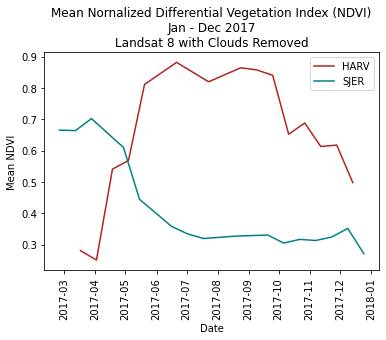

In [11]:
# Add only the plot code to this cell

# This is the final figure of mean NDVI
# for both sites across the year
# with data cleaned to deal with clouds

# YOUR CODE HERE

# create plot showing mean ndvi for each site over time (include legend)
colors = {"HARV": "firebrick",
          "SJER": "teal"}

fig, ax = plt.subplots()

for label, df in ndvi_for_plot.groupby("site"):
   # print(df)
    ax.plot(df.index,
            df.mean_ndvi,
            label=label,
            color=colors[label])
    
plt.legend()
plt.setp(ax.get_xticklabels(), rotation = 90)

ax.set(ylabel="Mean NDVI",
       xlabel="Date",
       title="Mean Nornalized Differential Vegetation Index (NDVI)\n"
       "Jan - Dec 2017\nLandsat 8 with Clouds Removed")

# plt.show()
### DO NOT REMOVE LINES BELOW ###
final_masked_solution = nb.convert_axes(plt, which_axes="current")

### DO NOT REMOVE LINES BELOW ###
final_masked_solution = nb.convert_axes(plt, which_axes="current")

In [12]:
# Ignore this cell for the autograding tests


In [13]:
# Ignore this cell for the autograding tests


# Question 1 (10 points)

Imagine that you are planning NEON’s upcoming flight season to capture remote sensing data in these locations and want to ensure that you fly the area when the vegetation is the most green.

When would you recommend the flights take place for each site? 

Answer the question in 2-3 sentences in the Markdown cell below.

For HARV, I would plan the flight right at the beginning of summer (late June).  
It was at that time in 2017 when the mean NDVI value was highest, however it 
stayed fairly high all summer so anytime in July/August should be good for 
planning a flight.  For SJER, I would plan the flight in early spring (late March).
This site shows a more dramatic drop off in mean NDVI as the spring/summer 
progresses, so it is highly important that the SJER flight occur in late March 
in order to see the most green vegetation.

# Question 2 (10 points)

How could you modify your workflow to look at vegetation changes over time in each site? 

Answer the question in 2-3 sentences in the Markdown cell below.

The two bands collected in the 'ndvi_bands' of the first function could be 
changed, in order to calculate a normalized difference of two different landsat 
bands.  For instance, the Normalized Difference Moisture Index (NDMI) is used 
to (monitor droughts and fuel levels in fire-prone areas, and would be 
calculated using near-infrared (NIR) and shortwave-infrared (SWIR) bands.

# Do not edit this cell! (10 points)

The notebook includes:
* additional Markdown cells throughout the notebook to describe: 
    * the data that you used - and where it is from
    * how data are being processing
    * how the code is optimized to run fast and be more concise

# Do not edit this cell! (20 points)

The notebook will also be checked for overall clean code requirements as specified at the **top** of this notebook. Some of these requirements include (review the top cells for more specifics): 

* Notebook begins at cell [1] and runs on any machine in its entirety.
* PEP 8 format is applied throughout (including lengths of comment and code lines).
* No additional code or imports in the notebook that is not needed for the workflow.
* Notebook is fully reproducible. This means:
   * reproducible paths using the os module.
   * data downloaded using code in the notebook.
   * all imports at top of notebook.

## BONUS - Export a  .CSV File to Share (10 points possible)

This is optional - if you export a **.csv** file with the columns specified above: Site, Date and NDVI Value you can get an additional 10 points.

* FULL CREDIT: File exists in csv format and contains the columns specified.
We will check your github repo for this file!
